In [1]:
import spectral.io.envi as envi
from proj.tasks import send_matrix_to_queue_task, read_image_spectral, clf_RF_1, read_col_data_from_file
import numpy as np
import pandas as pd
import sqlite3
from concurrent.futures import ThreadPoolExecutor, as_completed
import os
import json
from datetime import datetime
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
import time 

In [2]:
def load_result(result_path):
	with np.load(result_path) as file:
		return file["arr_0"]

In [104]:
# result_path = "./data/saved_result/T_J_predict_N_2024-03-02-22-23-30_using_get_max_bands.npz"
result_path = input('Nhap duong dan ket qua: ')
file_name = os.path.splitext(os.path.basename(result_path))[0]
nitos = load_result(result_path)

In [105]:
file_name

'J_predict_P_2024-03-04-22-03-03_using_get_max_bands'

In [106]:
def draw(result, file_output_path, color_map):
    # Assuming 'assigned_values' is your array with assigned values for each pixel
    # Replace this with your actual data
    assigned_values = np.random.randint(0, 255, size=(100, 100))

    # Define a colormap (you can choose any colormap from matplotlib)
    cmap = color_map

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Display the image with the assigned colors
    im = ax.imshow(result, cmap=cmap)

    # Add a colorbar to the right of the plot
    cbar = fig.colorbar(im, ax=ax)

    # Show the plot
    if os.path.exists(file_output_path):
        raise Exception(f"File {file_output_path} already exists.")
    else:
        print(f"File {file_output_path} not exists.")
    
    plt.gcf().set_dpi(300)
    plt.gcf().set_size_inches(8, 6)
    plt.gcf().savefig(file_output_path, dpi=300, bbox_inches="tight")
    plt.show()
    

In [146]:
def rgba(r, g, b, a):
    return [r/256, g/256, b/256, a]

In [108]:
def get_cmap(origin_cmap, number_color = 2000):
    origin_cmap_resampled = origin_cmap.resampled(number_color)
    newcolors = origin_cmap_resampled(np.linspace(0, 1, number_color))
    newcmp = ListedColormap(newcolors)
    return newcmp

In [147]:
newcmp_tab20c = get_cmap(mpl.colormaps['tab20c'], 8000)

In [148]:
# newcmp_tab20c.colors[0:400, :] = np.array(rgba(255, 255, 255, 1))
# newcmp_tab20c.colors[400:4000, :] = np.array(rgba(157, 157, 157, 1))
# newcmp_tab20c.colors[4000:4100, :] = np.array(rgba(215, 177, 154, 1))
# newcmp_tab20c.colors[4100:4200, :] = np.array(rgba(253, 223, 204, 1))
# newcmp_tab20c.colors[4200:4300, :] = np.array(rgba(227, 227, 147, 1))
# newcmp_tab20c.colors[4300:4400, :] = np.array(rgba(255, 255 , 60, 1))
# newcmp_tab20c.colors[4400:4500, :] = np.array(rgba(125, 255 , 9, 1))
# newcmp_tab20c.colors[4500:4600, :] = np.array(rgba(42, 220 , 0, 1))
# newcmp_tab20c.colors[4600:4700, :] = np.array(rgba(1, 173, 13, 1))
# newcmp_tab20c.colors[4700:4800, :] = np.array(rgba(10 , 143, 10, 1))
# newcmp_tab20c.colors[4800:4900, :] = np.array(rgba(11, 119, 18, 1))
# newcmp_tab20c.colors[4900:5000, :] = np.array(rgba(0, 106, 74, 1))
# newcmp_tab20c.colors[5000:5100, :] = np.array(rgba(0, 74, 74, 1))
# newcmp_tab20c.colors[5100:5200, :] = np.array(rgba(0, 100, 100, 1))
# newcmp_tab20c.colors[5200:5300, :] = np.array(rgba(0, 160, 160, 1))
# newcmp_tab20c.colors[5300:5400, :] = np.array(rgba(0, 188, 188, 1))
# newcmp_tab20c.colors[5400:5500, :] = np.array(rgba(0, 216, 216, 1))
# newcmp_tab20c.colors[5500:5600, :] = np.array(rgba(0, 240, 240, 1))
# newcmp_tab20c.colors[5600:5700, :] = np.array(rgba(129, 255, 255, 1))
# newcmp_tab20c.colors[5700:6000, :] = np.array(rgba(0, 0, 0, 1))
# newcmp_tab20c.colors[6000:7600, :] = np.array(rgba(0, 0, 0, 1))
# newcmp_tab20c.colors[7600:8000, :] = np.array(rgba(0, 0, 0, 1))


# newcmp_tab20c.colors[400:800, :] = np.array(rgba(31, 111, 79, 1))


newcmp_tab20c.colors[0:1, :] = np.array(rgba(0, 0, 0, 0.8))

newcmp_tab20c.colors[1:25, :] = np.array(rgba(156, 205, 147, 1))
newcmp_tab20c.colors[25:50, :] = np.array(rgba(131, 206, 117, 1))
newcmp_tab20c.colors[50:75, :] = np.array(rgba(88, 205, 68, 1))

newcmp_tab20c.colors[95:100, :] = np.array(rgba(239, 234, 88, 1))
newcmp_tab20c.colors[90:95, :] = np.array(rgba(208, 204, 80, 1))
newcmp_tab20c.colors[85:90, :] = np.array(rgba(168, 165, 68, 1))
newcmp_tab20c.colors[80:85, :] = np.array(rgba(119, 116, 47, 1))
newcmp_tab20c.colors[75:80, :] = np.array(rgba(75, 74, 30, 1))


newcmp_tab20c.colors[100:200, :] = np.array(rgba(188, 97, 43, 1))
newcmp_tab20c.colors[200:300, :] = np.array(rgba(188, 97, 124, 1))
newcmp_tab20c.colors[300:400, :] = np.array(rgba(157, 147, 87, 1))
newcmp_tab20c.colors[1600:8000, :] = np.array(rgba(157, 147, 255, 1))

# newcmp_tab20c.colors[800:1200, :] = np.array(rgba(31, 131, 79, 1))
# newcmp_tab20c.colors[800:1200, :] = np.array(rgba(31, 131, 79, 1))


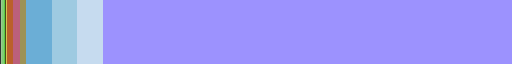

In [149]:
newcmp_tab20c

In [150]:
def generate_file_name(origin_file_path):
    i = 0
    file_name = os.path.splitext(os.path.basename(origin_file_path))[0]
    while os.path.exists(origin_file_path):
        file_name_new = f"{file_name}_{i}"
        origin_file_path = os.path.join(os.path.dirname(origin_file_path), f"{file_name_new}.png")
        i += 1
    return origin_file_path


File ./data/img_result_saved\J_predict_P_2024-03-04-22-03-03_using_get_max_bands_7.png not exists.


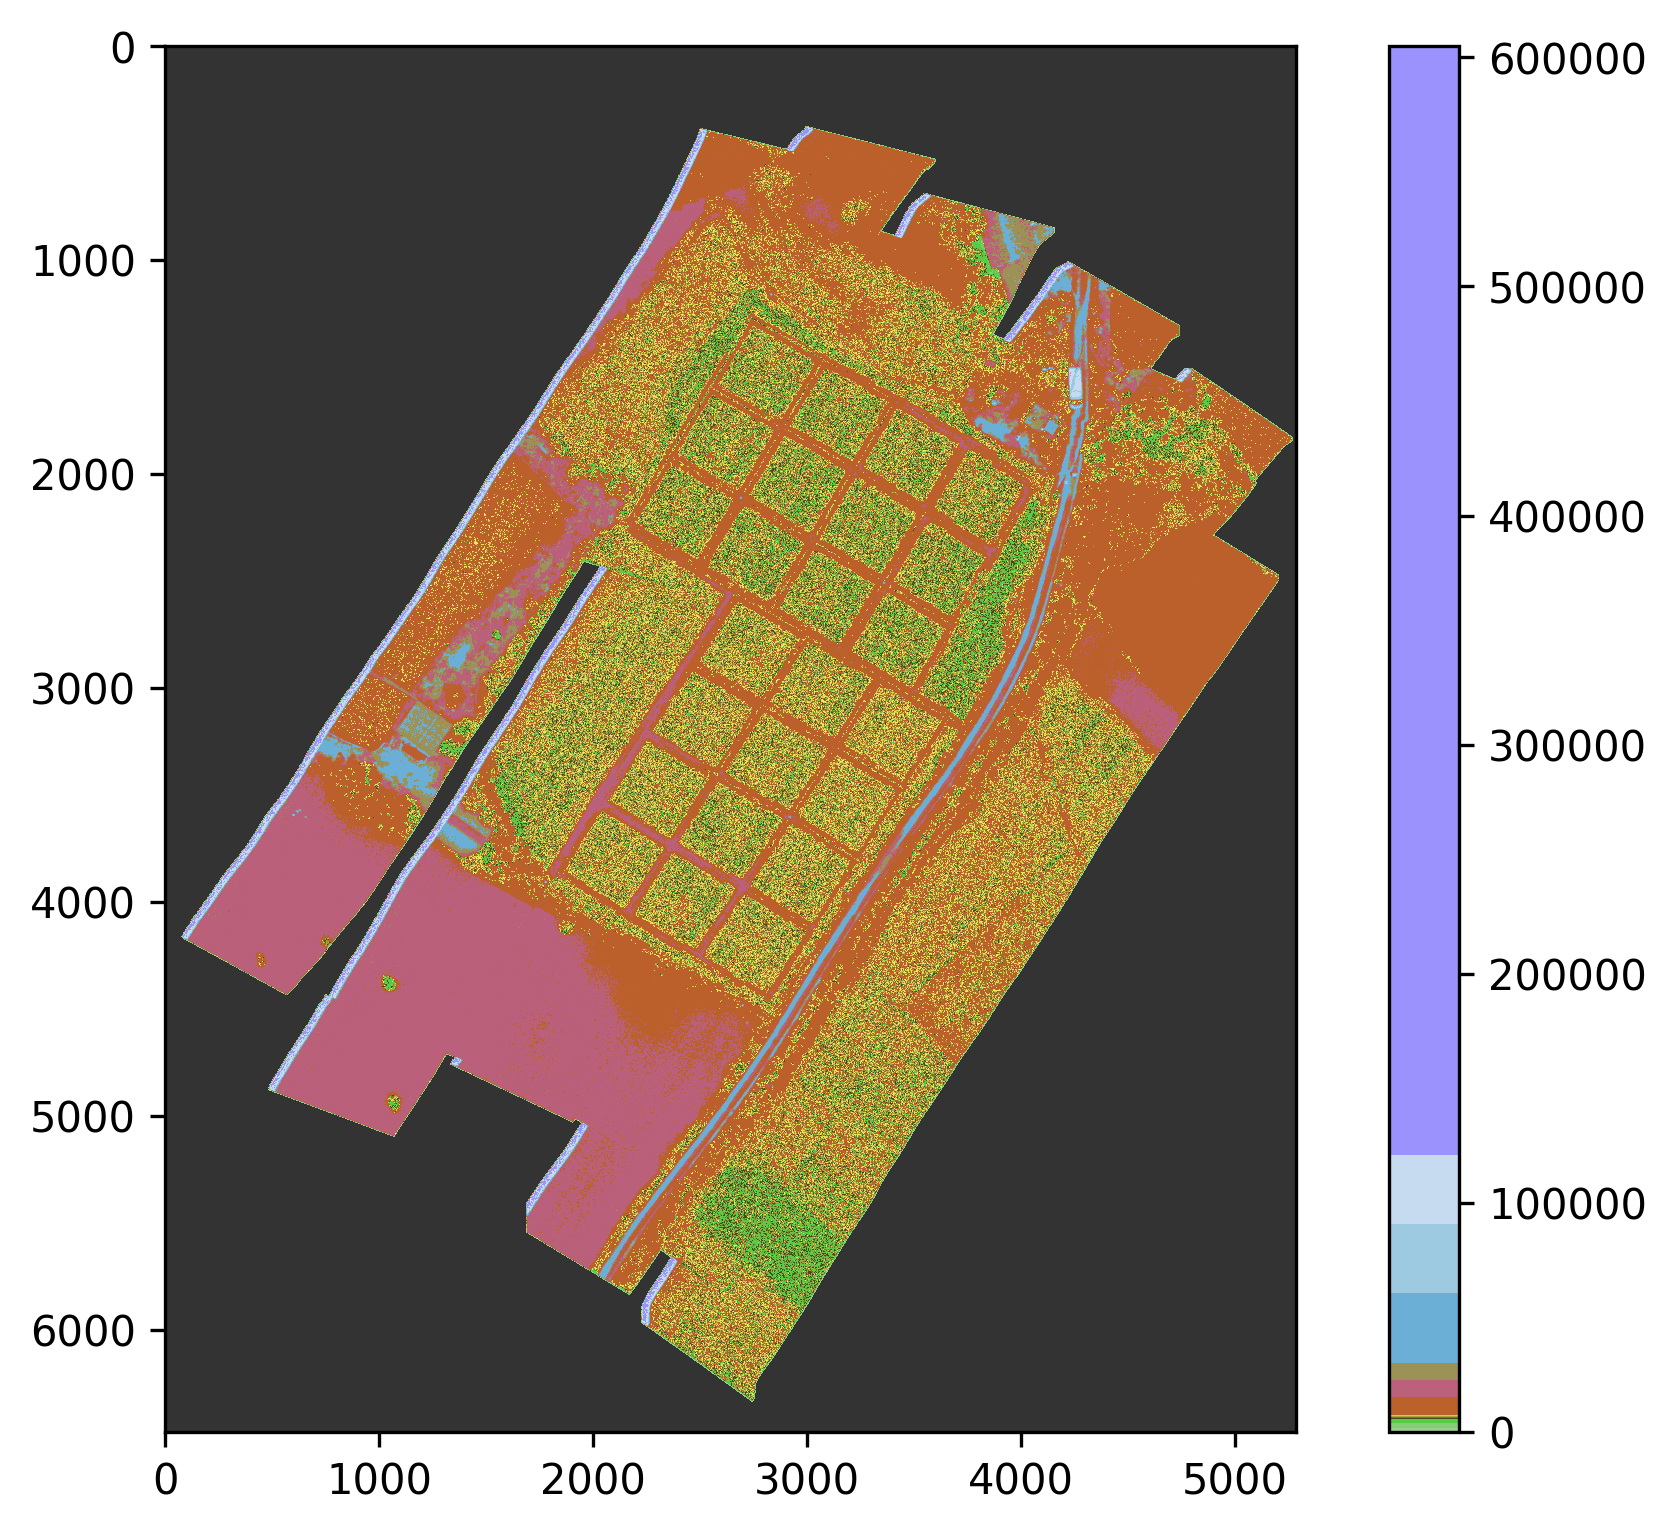

In [151]:
file_output_path = generate_file_name(f"./data/img_result_saved/{file_name}.png")
draw(nitos, file_output_path, newcmp_tab20c)